In [1]:
%matplotlib inline

from sklearn import svm
from WAVreader import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [2]:
filelist = ['Audio/1-1.wav',
            'Audio/1-2.wav',
            'Audio/2-1.wav',
            'Audio/2-2.wav',
            'Audio/3-1.wav',
            'Audio/3-2.wav',
            'Audio/4-1.wav',
            'Audio/4-2.wav',
            'Audio/5-1.wav',
            'Audio/5-2.wav',
            'Audio/6-1.wav',
            'Audio/6-2.wav',
            'Audio/7-1.wav',
            'Audio/7-2.wav',
            'Audio/8-1.wav',
            'Audio/8-2.wav',
            'Audio/9-1.wav',
            'Audio/9-2.wav',
            ]
info = WAVreader(filelist, [0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8], 0.05)
data = info.svmset

C= 1.0 #regularizaton parameter

trainset = []
testset = []

for i in xrange(len(data)):
    if i%10 < 3: testset.append(data[i])
    else: trainset.append(data[i])
print len(trainset),len(testset)



14.4615
Scaled 1005 windows down to 751
Finished file Audio/1-1.wav
14.603
Scaled 1013 windows down to 763
Finished file Audio/1-2.wav
14.6035
Scaled 883 windows down to 756
Finished file Audio/2-1.wav
14.1525
Scaled 895 windows down to 789
Finished file Audio/2-2.wav
14.5955
Scaled 1285 windows down to 1004
Finished file Audio/3-1.wav
14.6025
Scaled 1176 windows down to 985
Finished file Audio/3-2.wav
14.6025
Scaled 806 windows down to 651
Finished file Audio/4-1.wav
13.49
Scaled 1574 windows down to 1159
Finished file Audio/4-2.wav
14.598
Scaled 891 windows down to 759
Finished file Audio/5-1.wav
14.601
Scaled 1504 windows down to 1161
Finished file Audio/5-2.wav
14.6035
Scaled 963 windows down to 821
Finished file Audio/6-1.wav
14.6025
Scaled 1321 windows down to 1081
Finished file Audio/6-2.wav
14.596
Scaled 1265 windows down to 1013
Finished file Audio/7-1.wav
14.596
Scaled 2184 windows down to 1721
Finished file Audio/7-2.wav
14.6015
Scaled 1154 windows down to 916
Finished file 

In [8]:
clf = svm.SVC()
X = np.array([clip[0][:-1] for clip in trainset])
meanX = np.mean(X, axis=0)
varX = np.var(X, axis=0)
standardX = np.divide(X-meanX, varX)
Y = np.array([clip[1] for clip in trainset])
clf.fit(standardX,Y) 
testX = [clip[0][:-1] for clip in testset]
testY = [clip[1] for clip in testset]
testmeanX = np.mean(testX, axis=0)
testvarX = np.var(testX, axis=0)
teststandardX = np.divide(testX-testmeanX, testvarX)
print clf.score(standardX, Y)
print clf.score(teststandardX, testY)


0.483826305853
0.472253680634


Confusion matrix
[[ 94   1  21   8   3   7   3   9   5]
 [  5  66  42  16  10   8  10  20  12]
 [ 13  12 129  10  11   2  23   6   4]
 [  0  10   8  79  32   8  14  12  17]
 [  1   6  12  27 112   2  24   4   3]
 [  4  14   6  13  23  32  19  21  22]
 [  6  11  30  23  24   5 156  12   6]
 [  5   9  16  16  11   8  16  98  19]
 [  5  16  33  15  10   6  37  30  68]]


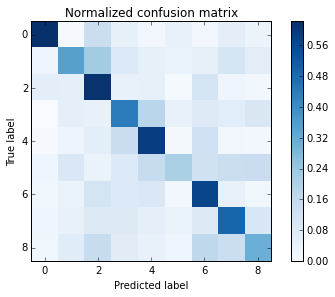

In [7]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

ytrue = testY
ypred = []
for clip in teststandardX:
    ypred.append(clf.predict(clip))
confusion=confusion_matrix(ytrue, ypred)
cm_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [9]:
precisions = np.array([(confusion[i][i]+0.0)/np.sum(confusion, axis=0)[i] for i in range(info.numClasses)])
meanp = np.mean(precisions)
recalls = np.array([(confusion[i][i]+0.0)/sum(confusion[i]) for i in range(info.numClasses)])
meanr = np.mean(recalls)
F1 = 2*meanr*meanp/(meanr+meanp)
print meanp
print meanr
print F1

0.47527509302
0.466060680721
0.470622788513


In [6]:
# Plotting SVM

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy + a * margin
yy_up = yy - a * margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure(fignum, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
			facecolors='none', zorder=10)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

plt.axis('tight')
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.figure(fignum, figsize=(4, 3))
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
fignum = fignum + 1

plt.show() 


ValueError: coef_ is only available when using a linear kernel